In [1]:
import sys
sys.path.append('../src')

from audio_classifier import AudioClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
classifier = AudioClassifier(data_path="../data/features/audio_features.csv") 
classifier.load_data()

In [3]:
classifier.preprocess_data()

In [4]:
config = {"lstm_units": 256, "dropout_rate": 0.3, "dense_units": 16, "num_dense_layers": 2}

classifier.build_model(**config)
classifier.train_model(epochs=50, batch_size=32)

C:\Users\redh0\PycharmProjects\MusicMind\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.4422 - loss: 1.3226 - val_accuracy: 0.7137 - val_loss: 0.8812
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.6415 - loss: 0.9593 - val_accuracy: 0.7672 - val_loss: 0.6994
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.6675 - loss: 0.8466 - val_accuracy: 0.7824 - val_loss: 0.6311
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7406 - loss: 0.7163 - val_accuracy: 0.8359 - val_loss: 0.5499
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.8147 - loss: 0.5773 - val_accuracy: 0.8168 - val_loss: 0.5078
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.8438 - loss: 0.5131 - val_accuracy: 0.8130 - val_loss: 0.5055
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8354 - loss: 0.4683 - val_accuracy: 0.8282 - val_loss: 0.4522
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.8405 - loss: 0.4370 - val_accuracy: 0.8550 - v

In [5]:
loss, accuracy = classifier.evaluate_model()
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8469 - loss: 0.4106 
Test Loss: 0.3713
Test Accuracy: 0.8702


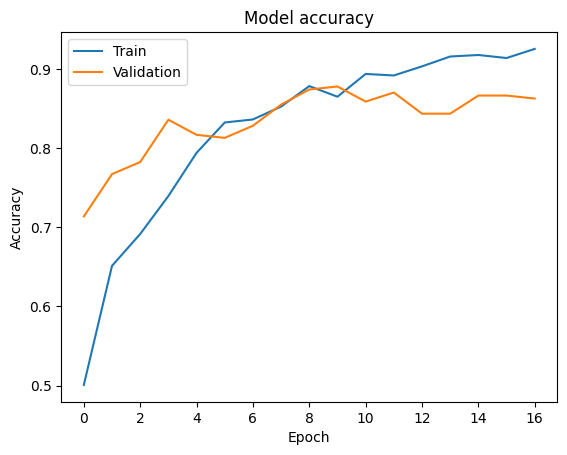

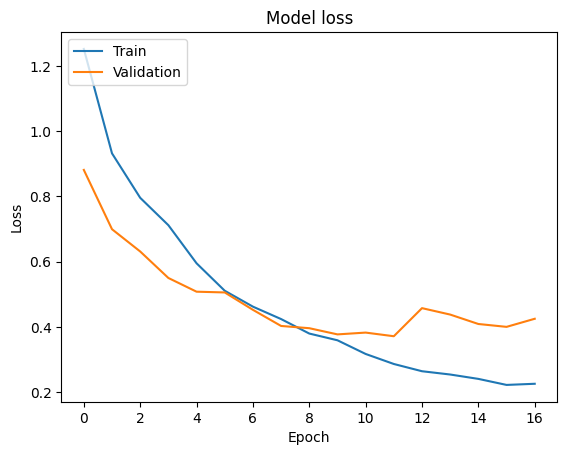

In [6]:
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(classifier.history.history['loss'])

plt.plot(classifier.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
classifier.save_model()

Modèle enregistré avec succès dans ../data/models\audio_classifier_model.h5
